# Ivan's Exploratory Notebook

**Import modules and dataset**

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_dir = "C:\\src\\data-mine/data/Employee.csv"

In [4]:
employee = pd.read_csv(data_dir)

## Data Size & Features Analyze

In [13]:
print("Number of Rows:", employee.shape[0],
      "\nNumber of Columns:", employee.shape[1])

Number of Rows: 4653 
Number of Columns: 9


In [14]:
print(employee.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [17]:
print(employee.isna().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


## Exploring Relationships

0 = Employee did not leave
1 = Employee did leave

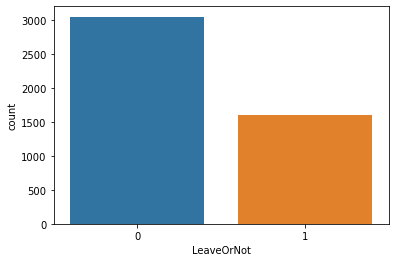

In [19]:
ax = sns.countplot(x="LeaveOrNot", data = employee)

~34% of employees left
~66% of the employees stayed

In [20]:
leave_or_not_count = employee['LeaveOrNot'].value_counts()
print(leave_or_not_count)

0    3053
1    1600
Name: LeaveOrNot, dtype: int64


Low correlation between predictor and independent variables

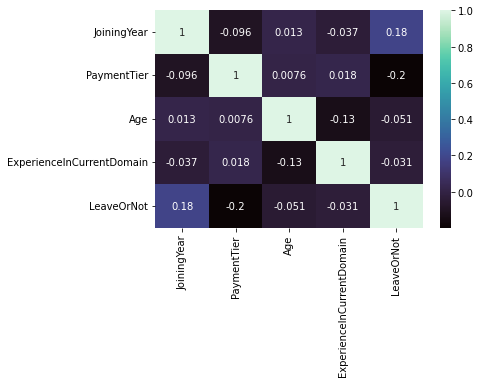

In [51]:
employee_corr = sns.heatmap(employee.corr(), cmap="mako", annot=True)
plt.show()

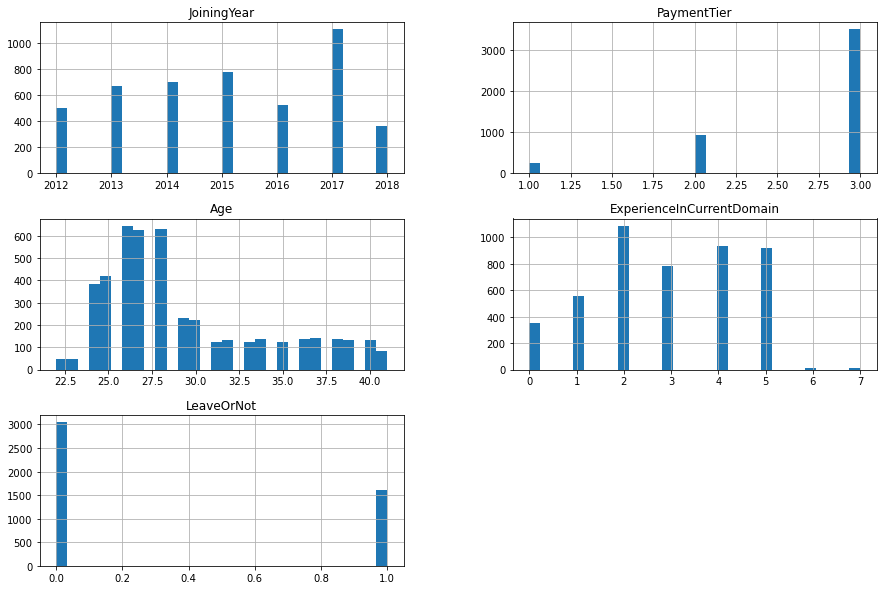

In [37]:
employee.hist(bins=30,figsize=(15,10))
plt.show()

Age histogram with leave or stay overlay

In [38]:
employee_leave = employee[employee.LeaveOrNot == 1]['Age']
employee_stay = employee[employee.LeaveOrNot == 0]['Age']

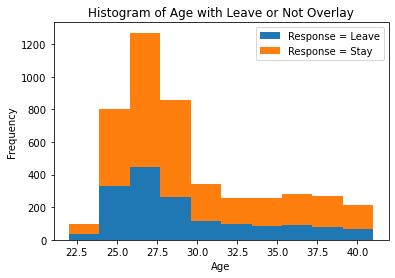

In [54]:
plt.hist([employee_leave, employee_stay], bins = 10, stacked = True)
plt.legend(['Response = Leave', 'Response = Stay'])
plt.title('Histogram of Age with Leave or Not Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency')
plt.show()

## Transforming data features for further analysis

Normalizing Age for overlay histogram

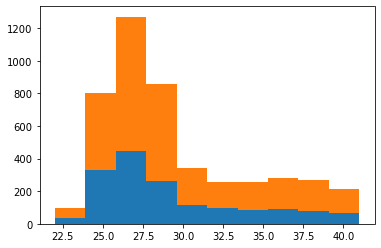

In [59]:
(n, bins, patches) = plt.hist([employee_leave, employee_stay], bins = 10, stacked = True)

In [60]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

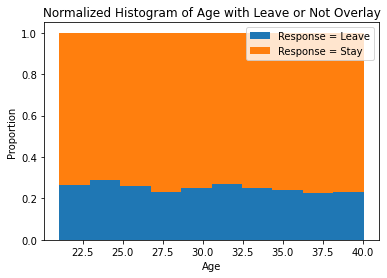

In [61]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0])
plt.legend(['Response = Leave', 'Response = Stay'])
plt.title('Normalized Histogram of Age with Leave or Not Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion');
plt.show()

Based on findings age is not a strong indicator for an employee leaving or staying